In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import os
import pylab
import numpy as np
import umap
import glob


In [3]:
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=2)

In [173]:
#list all csv files in folder
os.chdir('/Users/s1249052/PhD/flow data/vac69a/t cells only/experiment_210618_files/csv_by_person/05')
os.getcwd()
filenames = glob.glob('*.csv')
filenames



['14c11_sample1_01_0_0_T_cells.csv',
 '14c12_sample1_01_0_0_T_cells.csv',
 '14c13_sample1_01_0_0_T_cells.csv',
 '14c14_sample1_01_0_0_T_cells.csv',
 '14c15_sample1_01_0_0_T_cells.csv',
 'baseline_05.csv',
 'C+10_05.csv',
 'C+12_05.csv',
 'DoD_05.csv',
 'T+6_05.csv']

In [176]:
#give them sensible names and do an arcsinh transform

Baseline = pd.read_csv(filenames[5])
C_10 = pd.read_csv(filenames[6])
C_12 = pd.read_csv(filenames[7])
DoD = pd.read_csv(filenames[8])
T_6 = pd.read_csv(filenames[9])

Baseline = Baseline.apply(np.arcsinh, 'columns')
C_10 = C_10.apply(np.arcsinh, 'columns')
C_12 = C_12.apply(np.arcsinh, 'columns')
DoD = DoD.apply(np.arcsinh, 'columns')
T_6 = T_6.apply(np.arcsinh, 'columns')


In [177]:
# add a column that stores a value to later identify where each event came from

Baseline['Timepoint'] = 'C-1'
C_10['Timepoint'] = 'C+10'
C_12['Timepoint'] = 'C+12'
DoD['Timepoint'] = 'DoD'
T_6['Timepoint'] = 'T+6'


In [178]:
#put all those dataframes together in one object
concat = Baseline.append([C_10, C_12, DoD, T_6], ignore_index=True, sort=False)

In [179]:
#print(len(Baseline)+len(C_10)+len(C_12)+len(DoD)+len(T_6))
#print(len(concat))
#print(len(concat.columns))
#print(concat.columns)
#print(len(sub_concat.columns))

#check that the concatenated file looks good
sub_concat.iloc[:, 1:34].head(n=2)


,141Pr_HLA-DR,142Nd_BCL-2,143Nd_CD45RA,144Nd_GZB,145Nd_CD4,146Nd_Vd2,148Nd_ICOS,149Sm_CXCR5,150Nd_CD95,151Eu_CD103,...,167Er_CCR7,168Er_CD127,169Tm_CD38,171Yb_CD49d,172Yb_CD25,173Yb_CD39,174Yb_CLA,175Lu_Perforin,198Pt_CD8,209Bi_CD16
0,1.869941,2.693134,1.977025,2.676038,0.000000,0.0,0.0,0.0,4.30464,0.69495,...,1.682648,2.254379,1.662958,3.199282,0.656848,3.106472,0.620344,4.176309,4.818094,1.887082
1,0.000000,3.279704,4.139163,1.296033,0.301034,0.0,0.0,0.0,0.00000,0.00000,...,4.372120,1.389102,3.408406,2.272277,2.115351,2.137103,0.000000,0.274715,5.038764,1.981698


In [180]:
#fix the column names so it contains isotope and target

sub_concat = concat[["In115Di","Pr141Di", "Nd142Di", "Nd143Di", "Nd144Di", "Nd145Di", "Nd146Di", "Nd148Di", "Sm149Di", "Nd150Di", "Eu151Di", "Eu153Di", "Sm154Di", "Gd155Di", "Gd156Di", "Gd158Di",
    "Tb159Di", "Gd160Di", "Dy161Di", "Dy162Di", "Dy163Di", "Dy164Di", "Ho165Di", "Er166Di", "Er167Di", "Er168Di",
    "Tm169Di", "Yb171Di", "Yb172Di", "Yb173Di", "Yb174Di", "Lu175Di", "Pt198Di", "Bi209Di", 'Timepoint']].copy()
sub_concat.columns = ['115In_CD57', '141Pr_HLA-DR', '142Nd_BCL-2', '143Nd_CD45RA', '144Nd_GZB', '145Nd_CD4', '146Nd_Vd2',
    '148Nd_ICOS', '149Sm_CXCR5', '150Nd_CD95', '151Eu_CD103', '153Eu_Va7.2', '154Sm_TIM-3', '155Gd_PD1',
    '156Gd_CD161', '158Gd_CD27', '159Tb_FoxP3', '160Gd_CTLA4', '161Dy_Tbet', '162Dy_IntegrinB7', '163Dy_CD28', '164Dy_Ki-67',
    '165Ho_CD45RO', '166Er_CD56', '167Er_CCR7', '168Er_CD127', '169Tm_CD38', '171Yb_CD49d', '172Yb_CD25', '173Yb_CD39',
    '174Yb_CLA', '175Lu_Perforin', '198Pt_CD8', '209Bi_CD16', 'Timepoint']

In [167]:
# run umap with given parameters and make it ignore the timepoint column, then add the UMAP dimensions to the dataframe

reducer = umap.UMAP(n_neighbors=15, min_dist=0.2, n_components=2, metric='euclidean')
%time embedding = reducer.fit_transform(sub_concat.iloc[:, 1:34])
embedding.shape 
sub_concat['umap1'] = embedding[:, 0]
sub_concat['umap2'] = embedding[:,1]

CPU times: user 10min 4s, sys: 26.2 s, total: 10min 30s
Wall time: 8min 5s


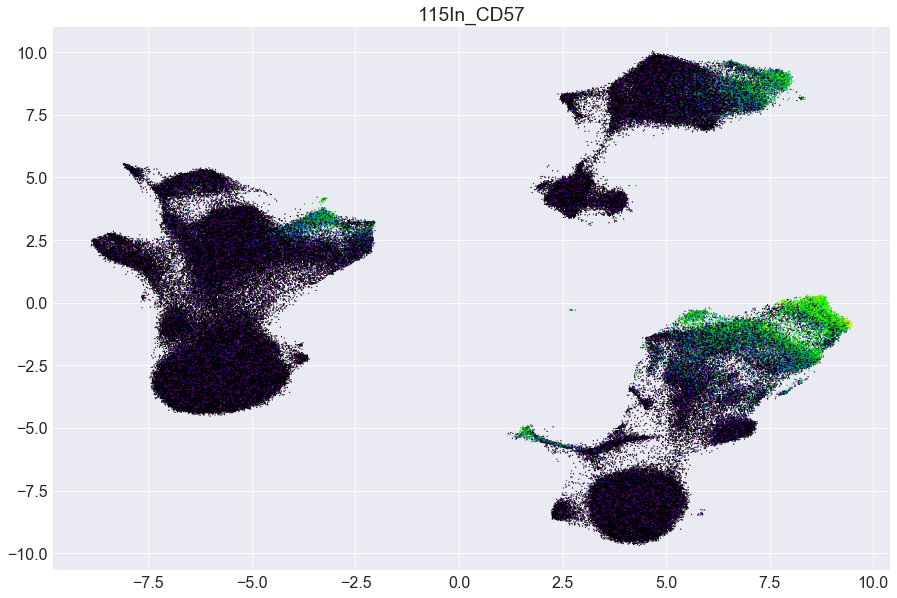

KeyboardInterrupt: 

In [169]:
#show a pdf for each channel

channels=list(sub_concat.columns.values)

for n in channels[0:34]:
    cmap=plt.get_cmap('nipy_spectral')
    fig=plt.figure(figsize=(15,10))
    ax=plt.subplot()
    ax.scatter(sub_concat['umap1'], sub_concat['umap2'],c=sub_concat[n], cmap=cmap, s=1)
    plt.title('{}'.format(n))
    #plt.savefig('{}.pdf'.format(n))
    plt.show()

In [181]:
#split the dataframes according to what file they originally came from

Baseline_csv = sub_concat[sub_concat['Timepoint'] == 'C-1']
C_10_csv = sub_concat[sub_concat['Timepoint'] == 'C+10']
C_12_csv = sub_concat[sub_concat['Timepoint'] == 'C+12']
DoD_csv = sub_concat[sub_concat['Timepoint'] == 'DoD']
T_6_csv = sub_concat[sub_concat['Timepoint'] == 'T+6']

Baseline_csv = Baseline_csv.drop(columns = ['Timepoint'])
C_10_csv = C_10_csv.drop(columns = ['Timepoint'])
C_12_csv = C_12_csv.drop(columns = ['Timepoint'])
DoD_csv = DoD_csv.drop(columns = ['Timepoint'])
T_6_csv = T_6_csv.drop(columns = ['Timepoint'])


In [182]:
# save dataframes as new csv files 

Baseline_csv.to_csv('baseline_05_UMAP.csv', sep=',') 
C_10_csv.to_csv('C+10_05_UMAP.csv', sep=',') 
C_12_csv.to_csv('C+12_05_UMAP.csv', sep=',') 
DoD_csv.to_csv('DoD_05_UMAP.csv', sep=',') 
T_6_csv.to_csv('T+6_05_UMAP.csv', sep=',') 

os.getcwd()

'/Users/s1249052/PhD/flow data/vac69a/t cells only/experiment_210618_files/csv_by_person/05'